# 離散選択問題入門(Python編)

## 金融財務研究会　

## 2021/5/24(月)午後

## 講師：森谷博之　Quasars22 Private Limited


### 内容

- 一部
    - 確率分布と最尤推定
        - ポアソン分布
        - 尤度
        - 疑似乱数と区間推定
        - 模型(モデル)
    - 一般化線形モデル
        - 線形予測子
        - リンク関数
    - 一般化線形モデルのモデル選択
        - 逸脱度
        - AIC
    - 一般化線形モデルの尤度比検定
    - 一般化線形モデルの適応範囲
        - 離散確率分布
            - ポアソン分布
            - 二項分布
            - 負の二項分布
        - 連続確率分布
            - 正規分布
            - ガンマ分布
    - 

- 二部
    - カリフォルニア教育問題：二項分布
    - スコットランドの選挙問題：ガンマ分布
    - ポルトガル産ワインデータ
    - 
    


### 参考文献：
- データ解析のために統計モデリング入門

- 離散選択問題オーバービュー(statsmodelsサンプルリファレンス)
- Generalized Linear Models AUnified Approach second edition Jeff Gill and Michelle Torres
- 
- 
- 
- 



# 確率分布と最尤推定

ポアソン分布は計数データを扱うために用いられます。

$p(y|\lambda)=\frac{\lambda^y \exp(-\lambda)}{y!}$

$\lambda$は平均を表します。

- 確率の和は１になる。
$\sum_{y=0}^{\infty} p(y|\lambda)=1$

- 確率分布の平均は$\lambda$である。

- 分散と平均はともに$\lambda$である。

#### 例

- 電気通信においてシステムに到着する電話の回数
- 天文学における望遠鏡に到達する光子の数
- 光学における単一のレーザーパルスで放出される光子の数
- 地震学では、大地震のリスクは漸近ポアソンモデルにしたがう
- 放射性サンプルの特定の時間間隔での崩壊の数

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

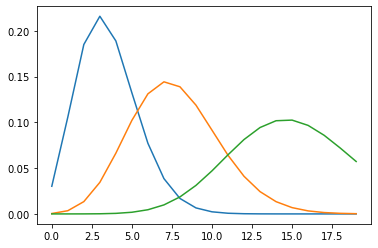

In [78]:
# 異なる平均をもつポアソン分布の形状
x = np.arange(0,20)
plt.plot(x, stats.poisson.pmf(x, 3.5))
plt.plot(x, stats.poisson.pmf(x, 7.7))
plt.plot(x, stats.poisson.pmf(x, 15.1))
plt.show()

#### 例題：架空データ５０個の分析

各データの取得と性質の把握

In [79]:
# データの取得
import rdata
parsed = rdata.parser.parse_file('data.rdata')
data1 = rdata.conversion.convert(parsed)

C:\Users\moriya\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:267: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")


In [80]:
# data1の内容の確認
data1

{'data': array([2., 2., 4., 6., 4., 5., 2., 3., 1., 2., 0., 4., 3., 3., 3., 3., 4.,
        2., 7., 2., 4., 3., 3., 3., 4., 3., 7., 5., 3., 1., 7., 6., 4., 6.,
        5., 2., 4., 7., 2., 2., 6., 2., 4., 5., 4., 5., 1., 3., 2., 3.])}

In [81]:
# data1の要素の個数の把握
len(data1)

1

In [82]:
# リストをデータフレームに変換
data1=pd.DataFrame(data1['data'].tolist())
data1.describe()

,0
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

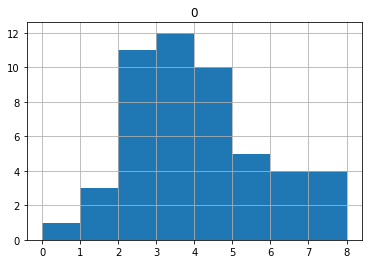

In [83]:
# data1の散布図の作成
data1.hist(bins=[0,1,2,3,4,5,6,7,8])

In [84]:
# 平均の取得
mu=data1.mean()
mu

0    3.56
dtype: float64

In [85]:
# 頻度の取得
data1.value_counts()

3.0    12
2.0    11
4.0    10
5.0     5
7.0     4
6.0     4
1.0     3
0.0     1
dtype: int64

In [86]:
# 分散と標準偏差の取得
data1.var(),data1.std()

(0    2.986122
 dtype: float64,
 0    1.72804
 dtype: float64)

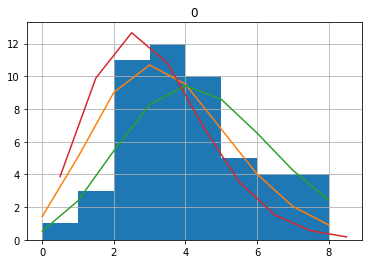

In [87]:
from scipy.stats import poisson
x=np.arange(0,9)
# 架空データのヒストグラムとポアソン分布のあてはめ
data1.hist(bins=[0,1,2,3,4,5,6,7,8])
plt.plot(x, poisson.pmf(x, mu)*50)
plt.plot(x, poisson.pmf(x, mu+1)*50)
plt.plot(x+0.5, poisson.pmf(x, mu-1)*50)
plt.show()

### 尤度

尤度：当てはまりの良さを示す指標

尤度は

$L(\theta|Y)=\Pi p(y_i|\theta)$

対数尤度は

$\log L(\theta|Y)=\sum_i \log p(y_i|\theta)$

尤度は全ての観測値$y_1$の確率の積です。

$L(\lambda)=p(y_1|\lambda)\cdot p(y_2|\lambda)\cdots p(y_n|\lambda)=\Pi_{i}p(y_i|\lambda)$

ポアソン分布では

$L(\lambda)=\Pi_i \frac{\lambda^y_i \exp(-\lambda)}{y_i!}$

$L(\lambda)$では扱いにくいので対数を取ります。

$\log L(\lambda)=\sum_i(y_i \log \lambda^\lambda-\sum_k^{y_i} \log k)$

対数尤度を最大にする$\lambda$を$\hat{\lambda}$とします。

$\frac{\partial \log L(\lambda)}{\partial \lambda}=\sum_i \left\{ \frac{y_i}{\lambda}-1 \right\}= \frac{1}{\lambda}\sum_i y_i - N$

ゆえに$\hat{\lambda}$はデータの標本平均になります。

- data1の異なる確率分布によるあてはめと対数尤度
    - ポアソン分布
    - 正規分布
    - ガンマ分布
    - 対数正規分布
    - ワイブル分布
    

In [88]:
logL_poi = np.sum(stats.poisson.logpmf(data1, mu=mu))

params_n = stats.norm.fit(data1)
logL_n = np.sum( stats.norm.logpdf(data1, loc=params_n[0], scale=params_n[1]) )

# data1には０が含まれているので、１ずらしていることに注意
params_g = stats.gamma.fit(data1+1,floc=0)
logL_g = np.sum( stats.gamma.logpdf(data1+1, params_g[0], loc=params_g[1], scale=params_g[2]) )

# data1には０が含まれているので、１ずらしていることに注意
params_logn = stats.lognorm.fit(data1+1,floc=0)
logL_logn = np.sum( stats.lognorm.logpdf(data1+1, params_logn[0], loc=params_logn[1], scale=params_logn[2]) )

params_w = stats.weibull_min.fit(data1.values,floc=0)
logL_w = np.sum( stats.weibull_min.logpdf(data1.values, params_w[0], loc=params_w[1], scale=params_w[2]) )

print('ポアソン',logL_poi)
print('正規分布', logL_n)
print('ガンマ分布',logL_g)
print('対数正規分布',logL_logn)
print('ワイブル分布',logL_w)

ポアソン -97.24400294080665
正規分布 -97.79125162659524
ガンマ分布 -97.17277595556963
対数正規分布 -98.9777768860124
ワイブル分布 -171.96331773228113


### 疑似乱数

標準誤差を見積もる方法としてコンピュータによる生成された乱数を利用する方法があります。このような乱数を疑似乱数といいます。疑似乱数を用いて各種分布の信頼区間を求めることができます。

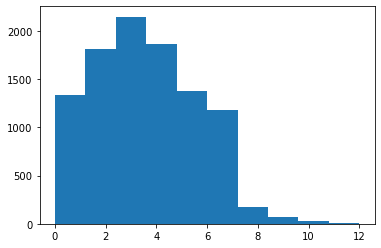

In [89]:
# ポアソン分布にしたがう確率変数の生成
s = np.random.poisson(mu, 10000)
plt.hist(s)
plt.show()

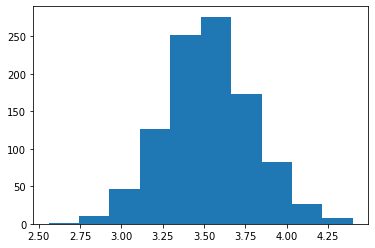

In [90]:
# 疑似乱数による信頼区間の生成:ポアソン分布の平均
v=[]
for i in range(1000):
    s = np.random.poisson(mu, 50)
    v.append(np.mean(s))
plt.hist(v)
plt.show()

## 模型(モデル)

模型とは、観測値を生起するメカニズムのことです。もっとも簡単なモデルは、確率分布、つぎは条件つき確率分布、線形単回帰分析などとなります。模型が決まると、その模型の母数(パラメータ)を推定します。しかし、実際問題として模型もパラメータも常に未知のままです。

真の模型(母集団)を得ることと、予測することは別の行為です。

- 真の模型: 真の模型は不偏的な原理を表現するもので、観測値(標本)を正確にあてはめることのできる模型です。しかし、真の模型を明確にすることは多くの場合で不可能であり、観測値を最もよくあてはめることのできる模型と混同しています。
- 予測のための模型：観測値を正確に再現できなくても、実用に耐えうる予測をすることは可能です。予測は観測値で模型を推定し、新しく得られた観測値で模型を評価した際に、実用に耐えうる条件を満たしていればよいと考えます。

# 一般化線形モデル

$y_i$を平均$\lambda$のポアソン分布にしたがうとして、$y_i$を説明する因子$x_i$を導入します。これを説明変数といいます。$y_i$の変動を、$x_i$が説明するという統計模型です。これをポアソン回帰といいます。また、このようなモデルを総称して一般化線形回帰モデルといいます。

一般化線形回帰モデルでは、$y_i$を応答変数,$x_i$を説明変数といいます。
$y_i$は平均$\lambda_i$のポアソン分布にしたがうとします。このポアソン分布を$p(y_i|\lambda_i)$と書きます。

$p(y_i|\lambda_i)=\frac{\lambda_i^{y_i}\exp(-\lambda_i)}{y_i!}$

データiの平均値$\lambda_i$が

$\lambda_i=\exp(\beta_1+\beta_2x_i)$

であると考えます。$\beta_1$は直線の切片で$\beta_2$は傾きです。この直線はついでも一定です。その指数関数が$\lambda_i$です。

両辺の対数を取ると

$\log \lambda_i=\beta_1+\beta_2x_i$

となり、右辺を線形予測子といいます。また、左辺は平均の関数になっています。この関数をリンク関数といい、対数関数を用いているので、対数リンク関数とよばれます。

パラメータ$\beta_1,\beta_2$は未知ですのでのそれらを推定します。推定値の取得には最尤推定法が用いられます。

$\log L(\beta_1,\beta_2)=\sum_i \log \frac{ \lambda_i^{y_i} \exp(-\lambda_i)}{y_i!}$

$\lambda_i$は$\beta_1,\beta_2$の関数です。

- 新しいデータの取得

In [91]:
data3a = pd.read_csv('data3a.csv')

In [92]:
# fはカテゴリカル(質的変数)データ
data3a.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [93]:
# 量的変数の主な要約統計量
# Pythonでは質的変数の統計量は提示されない
data3a.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


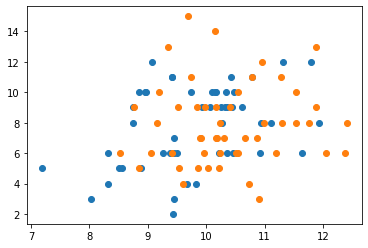

In [94]:
# ｆにより分類してデータを可視化
plt.scatter(data3a[data3a.f=="C"].x,data3a[data3a.f=="C"].y)
plt.scatter(data3a[data3a.f=="T"].x,data3a[data3a.f=="T"].y)
plt.show()

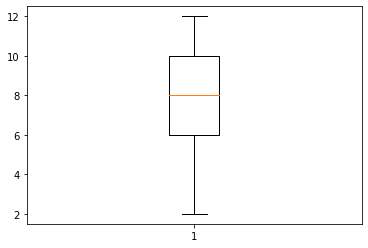

In [95]:
# f=Cの箱ひげ図
# 箱ひげ図のてっぺんは最大値、そこは最小値です。
# 中央の箱は底辺が第一四分位で、天井が第３四分位、中央の赤い線が中央値です。
plt.boxplot(data3a[data3a.f=="C"].y)
plt.show()

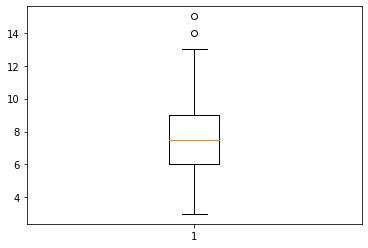

In [96]:
# f=Tの箱ひげ図
# 箱ひげ図では第３(第１)四分位の1.5(1/1.5)倍から外れ値となり、〇で表します。
plt.boxplot(data3a[data3a.f=="T"].y)
plt.show()

number of data: 13


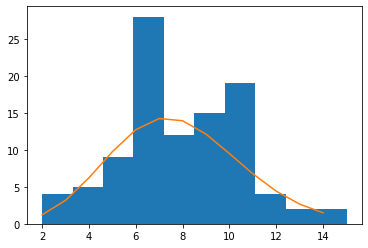

In [97]:
plt.hist(data3a.y)
x = np.arange(min(data3a.y),max(data3a.y))
print('number of data:',len(x))
plt.plot(x,poisson.pmf(x, 7.83)*len(data3a.y))
plt.show()

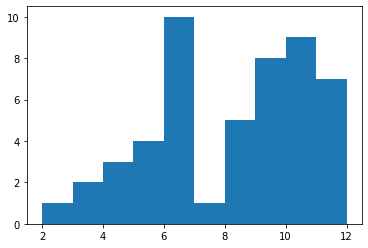

In [98]:
plt.hist(data3a[data3a.f=="C"].y)
plt.show()

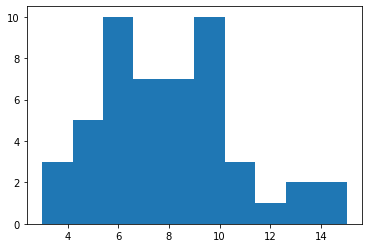

In [99]:
plt.hist(data3a[data3a.f=="T"].y)
plt.show()

In [100]:
data3a_exog=sm.add_constant(data3a.x)# 切片の追加
pglm = sm.GLM(data3a.y, data3a_exog, family=sm.families.Poisson()) #モデルの設定 
res=pglm.fit()# モデルの最適化
res.summary() # サマリーレポートの出力

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 24 May 2021   Deviance:                       84.993
Time:                        01:57:53   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

サマリーレポート(res.summary())の上半分は、総合的なレポートで、下半分は回帰係数に関するものです。

- coef:回帰係数

- std err: 各回帰係数の標準誤差です。推定値$\hat{\theta}$のバラツキを標準偏差で表しています。推定値$\hat{\theta}$は統計量なので正規分布にしたがうと仮定します。

- z: z値は最尤推定値$\hat{\theta}$を標準誤差で割ったものです。Wald統計量といいます。

- P>|z|: z値のp値です。この検定の帰無仮説は最尤推定値$\hat{\theta}=0$ですから、平均z、標準偏差が1の正規分布の－∞から0までの累積確率の2倍です。この確率が大きいほどz値はゼロにちかいことになり、帰無仮説を棄却できなくなります。

- [0.025 0.975]:回帰係数のWald信頼区間です。

サマリーレポート上半分については

- Scale: 共分散マトリックスのスケールパラメータ。ポアソン分布のディフォルト値は1です。
- Log-likelihood: 対数最尤推定値です。
- Deviance：あてはまりの悪さを示す逸脱度です。最大対数尤度$\log L_*$に-2をかけたものです。$R^2$の代替といして使用されます。
- Pearson chi2: $\sum \frac{(観測値-期待値)^2}{期待値}$です。
- method: Iteratively reweighted least squares (IRLS);IRLSはニュートン法を用いたベルヌーイ分布の対数尤度を最大化する最適化法と同等です。

最尤推定の過程で得られる$\lambda_i$はPythonではmuで得られます。muは観測値の数だけ得られるので、その平均と観測値の平均を比べてみます。

In [101]:
#mu=res.fittedvalues
mu=res.mu
print('mu',np.mean(mu))
print('平均',np.mean(data3a.y))

mu 7.8300000000000045
平均 7.83


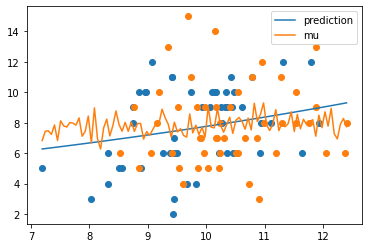

In [102]:
# 回帰直線と平均(λ)のプロット
xx=np.linspace(min(data3a.x),max(data3a.x),100)
# linspaceは第一引数と第二引数の間を第三引数個に分割します。

plt.scatter(data3a[data3a.f=="C"].x,data3a[data3a.f=="C"].y)
plt.scatter(data3a[data3a.f=="T"].x,data3a[data3a.f=="T"].y)
plt.plot(xx,np.exp(1.2917+0.0757*xx),label='prediction')

plt.plot(xx,mu,label='mu')
plt.legend()
plt.show()

In [103]:
# 説明変数をｆ(T)とした場合
ff=pd.get_dummies(data3a.f)# 質的変数(カテゴリカルデータ)をダミー変数(0,1)に変換します。
data3a_exog=sm.add_constant(ff['T'])
pglm = sm.GLM(data3a.y, data3a_exog, family=sm.families.Poisson())
res=pglm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 24 May 2021   Deviance:                       89.475
Time:                        01:57:53   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000       1.952       2.151
T              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [104]:
# 説明変数をｆ(C,T)とした場合
ff=pd.get_dummies(data3a.f)
data3a_exog=sm.add_constant(ff)
pglm = sm.GLM(data3a.y, data3a_exog, family=sm.families.Poisson())
res=pglm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 24 May 2021   Deviance:                       89.475
Time:                        01:57:53   Pearson chi2:                     87.1
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3720      0.024     57.584      0.000       1.325       1.419
C              0.6796      0.038     18.006      0.000       0.606       0.754
T              0.6924      0.038     18.415      0.000       0.619       0.766
==============================================================================
"""

In [105]:
# 説明変数をxとｆ(T)とした場合
# pandasのconcatを用いて２つのデータを結合しています。
xxx=pd.concat([data3a.x,ff['T']],axis=1)
data3a_exog=sm.add_constant(xxx)
pglm = sm.GLM(data3a.y, data3a_exog, family=sm.families.Poisson())
res=pglm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Mon, 24 May 2021   Deviance:                       84.808
Time:                        01:57:53   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
T             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

# GLM のモデル選択

- 逸脱度(Deviance)
    - $R^2$の代替
    - フルモデル($\lambda_i$のすべてについて正確に予測できた場合)
    - ナルモデル($\beta_0$以外のすべての回帰係数は０)サマリーレポートではnull
    - 逸脱度=-2×ln(予測モデルの尤度/フルモデルの尤度)
    - ナル逸脱度=-2×ln(ナルモデルの尤度/フルモデルの尤度)
    - フルモデル逸脱度=-2×ln(フルモデルの尤度/フルモデルの尤度)
    - res.devianceは残差逸脱度
- AIC：予測にもちいられる赤池情報量基準
    - AIC＝-2×(対数尤度-自由パラメータの数)
- 

## 逸脱度(Deviance)


In [106]:
data3a_exog=sm.add_constant(data3a.x)
pglm = sm.GLM(data3a.y, data3a_exog, family=sm.families.Poisson())
res=pglm.fit()
print('残差逸脱度(deviance)',res.deviance)
print('最尤推定値',res.llf)
print('逸脱度',-res.llf*2)
print('AIC',res.aic)

残差逸脱度(deviance) 84.99299649072958
最尤推定値 -235.3862507698608
逸脱度 470.7725015397216
AIC 474.7725015397216


In [107]:
# ナルモデルのλi
# 最適化するとナルモデルの結果も保存されています。
res.null

array([7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83,
       7.83])

In [108]:
res.null_deviance, res.llnull,-res.llnull*2

(89.50693756958132, -237.6432213092868, 475.2864426185736)

In [109]:
#ナルモデルの設定
pglm = sm.GLM(data3a.y, res.null, family=sm.families.Poisson())
res=pglm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 24 May 2021   Deviance:                       89.507
Time:                        01:57:53   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2628      0.005     57.586      0.000       0.254       0.272
==============================================================================
"""

In [110]:
# ナルモデル：muが観測値の平均値
logL_poi = np.sum(stats.poisson.logpmf(data3a.y, mu=np.mean(data3a.y)))
logL_poi,-2*logL_poi

(-237.6432213092866, 475.2864426185732)

In [111]:
# フルモデル：mu_iが事前にわかっている。
logL_poi_min = np.sum(stats.poisson.logpmf(data3a.y, mu=data3a.y))
print('フルモデルの最尤推定値',logL_poi_min)
print('フルモデルの逸脱度',-2*logL_poi_min)
print('xモデルの逸脱度: モデルの逸脱度-フルモデルの逸脱度',-2*res.llf+2*logL_poi_min)
print('xモデルの逸脱度',res.deviance)

フルモデルの最尤推定値 -192.88975252449595
フルモデルの逸脱度 385.7795050489919
xモデルの逸脱度: モデルの逸脱度-フルモデルの逸脱度 89.50693756958151
xモデルの逸脱度 89.50693756958138


## [AIC(赤池情報量規準)](https://ja.wikipedia.org/wiki/%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9の87%8F%E8%A6%8F%E6%BA%96)

つぎにどのようにモデルを選択したらよいのか考えてみます。赤池情報量基準を用いますが、ここでいう情報の意味は一般的な使用とは異なるので注意が必要です。情報には多様な意味がり、ここでは情報理論に基づく意味です。それは情報・通信を数学的に扱い、情報の定量化に用いられます。そして情報量とはある事象が起きた際にそれがどれほど起こりにくいかを示す尺度です。確定的な事象には情報量が少なく、不確定な事象ほど情報量が多くなります。ある事象Eが起きたときに受け取る情報量は、その確率の対数をとりそのマイナスを取ったものです。

赤池情報量規準は、統計モデルの良さを評価するための指標です。その情報量の測定には確率ではなくて、尤度を用います。尤度は尤度関数とも呼ばれ、B=bであることが確定している場合に、Aが起きる確率の関数のことです。具体的にはAIC最小のモデルを選択します。(wiki)

$AIC=-2\ln L +2k $

$L:$ 最大尤度  
$k:$ 自由パラメータ数
標本の大きさが$n$で各標本の誤差項が独立で確率分布が正規分布、かつ各標本誤差が等しい場合には

$AIC=n \ln \sigma^2 +2k$  

# GLMの尤度比検定と検定の非対称性

# GLMの応用範囲を広げる

一般化線形回帰は確率分布、リンク関数、線形予測子をいろいろと組み合わせることでさまざまな特徴をもったデータに適応できます。

Fisher(1934)は一般に使われている確率質量関数と確率密度関数が指数分布と呼ばれる分布の特別の場合ではないかと提案しました。

- 離散確率分布
    - 二項分布
    - ポアソン分布
    - 負の二項分布
- 連続確率分布
    - ガンマ分布
    - 正規分布
    

- それぞれの分布に適応できるstatsmodelsのリンク関数 ![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/7cbf8b94-3003-6164-d78b-002da80985ce.png)

### 例題　上限のある計数データ

二項分布は上限のある計数データに使います。応答変数$y_i$は$y_i \in {0,2,3,...,8}$とします。

二項分布で二値のデータの特性を表現できます。

二項分布の確率分布は

$ p(y|N,q)=_NC_y q^y(1-q)^{N-y}$

で与えられます。$ p(y|N,q)$は$N$個から$y$個で表現できる事象が生起する確率です。$_NC_y$は異なる$N$個から$y$個を選ぶ組み合わせの総数のことです。これは

$_NC_y=\frac{(N-y+1)!}{y!}$

です。

豆知識：nPrは異なるn個からr個を選んで並べた順列の総数です。これは樹形図を書けば簡単に求まります。一方でnCrは組み合わせの総数です。組み合わせは選んでいるだけです。ですからABとBAの順番を区別しません。したがって、順列から重複分を補正します。並べ方の総数はr!ですから、その分を順列から割れば、組み合わせになります。

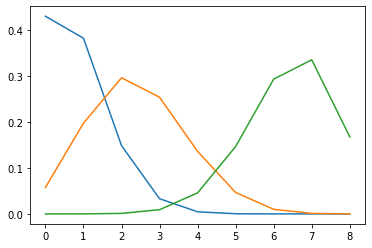

In [112]:
# 二項分布と計数の上限と確率の確認
from scipy.stats import binom
x = np.arange(0,9)
plt.plot(x, binom.pmf(x, 8, 0.1))
plt.plot(x, binom.pmf(x, 8, 0.3))
plt.plot(x, binom.pmf(x, 8, 0.8))

#### ロジットリンク関数

ロジスティック回帰では確率分布は二項分布、リンク関数にはロジットリンク関数を使います。

ロジスティック関数は

$q_i=logistic(z_i)=\frac{1}{1+\exp(-z_i)}=\frac{\exp(z_i)}{1+\exp(z_i)}$

です。$z_i=\beta_1+\beta_2x_i+,.....$は線形予測子です。

ロジスティック関数は

$logit(q_i)=\log\frac{q_i}{1-q_i}=z_i$

と変形でき、ロジット関数といいます。ロジット関数はロジスティック関数の逆関数です。

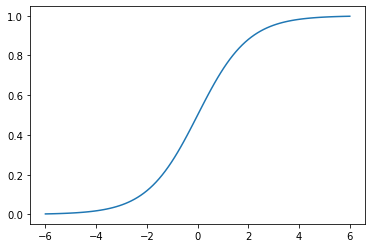

In [113]:
from scipy.stats import logistic
x = np.linspace(-6,6, 100)
plt.plot(x, logistic.cdf(x))

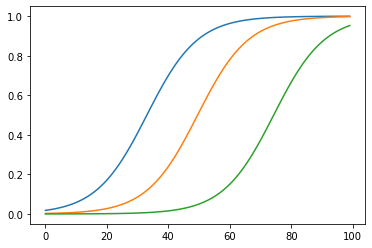

In [114]:
x=np.linspace(-3,3,100)
p=1/(1+np.exp(-(2+2*x)))
plt.plot(p)
p=1/(1+np.exp(-(0+2*x)))
plt.plot(p)
p=1/(1+np.exp(-(-3+2*x)))
plt.plot(p)

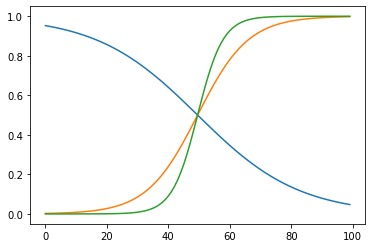

In [115]:
x=np.linspace(-3,3,100)
p=1/(1+np.exp(-(-1*x)))
plt.plot(p)
p=1/(1+np.exp(-(2*x)))
plt.plot(p)
p=1/(1+np.exp(-(4*x)))
plt.plot(p)

#### パラメータ推定

二項分布のパラメータを推定します。尤度関数は

$L({\beta_j})=L(\beta_1,...)=\Pi _{N_i}C_{y_i}q_i^{y_i}(1-q_i)^{N_i-y_i}$

で対数を取ると

$\log L({\beta_j})=\sum_i [\log _{N_i}C_{y_i} +y_i\log(q_i)+(N_i-y_i)\log(1-q_i)]$

In [116]:
# 新しいデータの取得
data4a = pd.read_csv('data4a.csv')

In [117]:
# データの確認
data4a[:5]

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [118]:
# データの統計量の確認
data3a.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [119]:
# 応答変数の作成　(成功の数、失敗の数)
y=pd.concat([data4a.y,data4a.N-data4a.y],axis=1)
y=y.values.tolist()
y[:5]

[[1, 7], [6, 2], [5, 3], [6, 2], [1, 7]]

In [120]:
# 説明変数の作成　
# xの取得
x=data4a.iloc[:,2]
# fを取得して、カテゴリカルデータをダミー変数に変換
xx=pd.get_dummies(data4a.iloc[:,3])
xx=xx.iloc[:,1]#CとTのダミー変数の内Tを取得
xx[:5]

0    0
1    0
2    0
3    0
4    0
Name: T, dtype: uint8

In [121]:
# x とfを結合
x=pd.concat([x,xx],axis=1)
x=sm.add_constant(x)
x[:5]

,const,x,T
0,1.0,9.76,0
1,1.0,10.48,0
2,1.0,10.83,0
3,1.0,10.94,0
4,1.0,9.37,0


In [122]:
# 二項分布による最適化
bpglm = sm.GLM(y, x, family=sm.families.Binomial())
res_b=bpglm.fit()
res_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Mon, 24 May 2021   Deviance:                       123.03
Time:                        01:57:54   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.5361      1.414    -13.818      0.000     -22.307     -16.765
x              1.9524      0.139     14.059      0.000       1.680       2.225
T              2.0215      0.231      8.740      0.000       1.568       2.475
==============================================================================
"""

- ロジスティックリンク関数：意味と解釈

ロジット関数は

$logit(q_i)=\log\frac{q_i}{1-q_i}=z_i$

ですから、指数関数をとって

$\frac{q_i}{1-q_i}=\exp(z_i)=\exp(\beta_1+\beta_2 x_i+\beta_3 f_i)$

となります。$\frac{q_i}{1-q_i}$をオッズといいます。これは$\exp(\beta_1)\exp(\beta_2 x_i)\exp(\beta_3 f_i)$と等しくなります。切片を除いて考えると

$\frac{q_i}{1-q_i}=\exp(1.95x_i)\exp(2.02f_i)$

$x_i$が１単位増えると$\exp(1.95)$倍になるので、オッズは７倍ほど増えます。$f_i$が一単位増えるとオッズは7.5倍程度増えます。

In [123]:
np.exp(1.95),np.exp(2.02)

(7.028687580589293, 7.538324933661922)

### ガンマ分布のGLM

ガンマ分布の確率密度関数は

$p(y|x,r)=\frac{r^2}{\Gamma(s)}y^{s-1}\exp(-ry)$

$s$は形状パラメータ、$r$が率パラメータ、$\Gamma(s)$はガンマ関数です。

平均: $s/r$

分散: $s/r^2$

となります。

##### ガンマ分布の応用

- 通信工学におけるトラフィックの待ち時間の分布
- 所得の分布
- 信頼性工学における電子部品の寿命の分布
- 雨粒の分布
- 保険金請求の分布
- ガン患者の年齢の分布
- 神経科学の発火時間間隔(興奮抑制)の分布
- バクテリア遺伝子発現における構造発現たんぱく質のコピーの数
- ゲノミクスにおけるChIP-chip分析のピークコーリングステップの分布

変数が正の値だけを取る場合などに使われます。

In [124]:
import rdata
parsed = rdata.parser.parse_file('d.RData')
data_g = rdata.conversion.convert(parsed)
data_g=pd.DataFrame(data_g['d'])
data_g.head()

C:\Users\moriya\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:267: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")


,x,y
0,0.001000,0.000887
1,0.017306,0.023465
2,0.033612,0.069876
3,0.049918,0.034340
4,0.066224,0.026520


In [125]:
xx=sm.add_constant(np.log(data_g.x))
gglm = sm.GLM(data_g.y, xx, family=sm.families.Gamma(sm.families.links.log()))
res=gglm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.32508
Method:                          IRLS   Log-Likelihood:                 58.471
Date:                Mon, 24 May 2021   Deviance:                       17.251
Time:                        01:57:55   Pearson chi2:                     15.6
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0403      0.119     -8.759      0.000      -1.273      -0.808
x              0.6832      0.068      9.992      0.000       0.549       0.817
==============================================================================
"""

In [126]:
y_hat=res.predict()

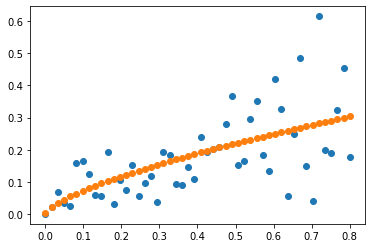

In [127]:
plt.scatter(data_g.x,data_g.y)
plt.scatter(data_g.x,y_hat)

# 例

## 例１：カリフォルニア州教育方針とその成果


教育問題の分析は難しく、経済学者と教育学者の間でアプローチがまったく異なります。


観測データ数：303(カリフォルニア州の郡)

変数の数：13項目＋8相互作用項

変数名と内容：

    - NABOVE   - 数学の成績で国内の中央値を上回る生徒の数
    - NBELOW   - 数学の成績で国内の中央値を下回る生徒の数
    - LOWINC   - 低所得層の生徒の割合
    - PERASIAN - アジアの生徒の割合
    - PERBLACK - ブラックの生徒の割合
    - PERHISP  - ヒスパニックの生徒の割合
    - PERMINTE - マイノリティ教師の割合
    - AVYRSEXP - 先生の教育に従事した年数の和を先生の数で割った平均値
    - AVSALK   - 総給与予算額をフルタイムの先生の数で割った平均値
    - PERSPENK - １生徒あたりの支出額
    - PTRATIO  - 先生と生徒の比率
    - PCTAF    - UC/CSUの準備コースを受けた生徒の割合
    - PCTCHRT  - チャータースクールの割合
    - PCTYRRND - year-round スクールの割合

相互作用項

    - PERMINTE_AVYRSEXP
    - PEMINTE_AVSAL
    - AVYRSEXP_AVSAL
    - PERSPEN_PTRATIO
    - PERSPEN_PCTAF
    - PTRATIO_PCTAF
    - PERMINTE_AVTRSEXP_AVSAL
    - PERSPEN_PTRATIO_PCTAF

In [128]:
cdata = sm.datasets.star98.load(as_pandas=False)
cdata.exog = sm.add_constant(cdata.exog, prepend=False)
print(cdata.endog[:5,:])

[[452. 355.]
 [144.  40.]
 [337. 234.]
 [395. 178.]
 [  8.  57.]]


(357.8151815181518, 199.0)

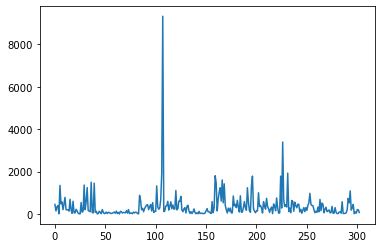

In [129]:
plt.plot(cdata.endog[:,0])
np.mean(cdata.endog[:,0]),np.median(cdata.endog[:,0]),

In [130]:
unique, freq = np.unique(cdata.endog[:,0]+cdata.endog[:,1], return_counts=True) #return_counts=Trueが肝
mode = unique[np.argmax(freq)]
mode

120.0

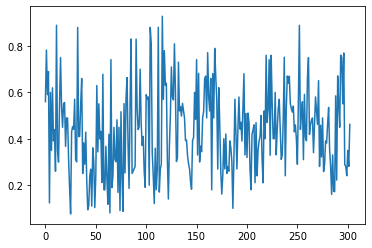

In [131]:
plt.plot(cdata.endog[:,0]/(cdata.endog[:,0]+cdata.endog[:,1]))

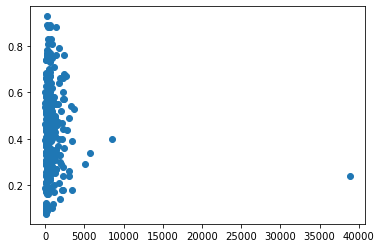

In [132]:
plt.scatter(cdata.endog[:,0]+cdata.endog[:,1],cdata.endog[:,0]/(cdata.endog[:,0]+cdata.endog[:,1]))

In [133]:
glm_binom = sm.GLM(cdata.endog, cdata.exog, family=sm.families.Binomial())
cres = glm_binom.fit()
print(cres.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Mon, 24 May 2021   Deviance:                       4078.8
Time:                        01:57:55   Pearson chi2:                 4.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.0

In [134]:
len(y_hat),

(50,)

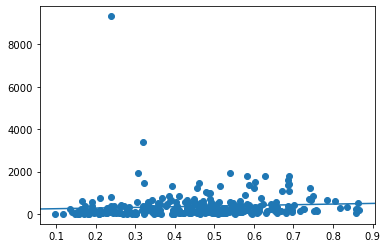

In [135]:
y_hat=cres.predict()
fig, ax = plt.subplots()
ax.scatter(y_hat, cdata.endog[:,0])
line_fit = sm.OLS(cdata.endog[:,0], sm.add_constant(y_hat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

## 例：スコットランドの選挙 (ガンマ分布)

データはGillの例を基にしている。地方税に関する権限を議会に与えるために「はい」と答えた人の割合である。データは32の地区に分割されている。この例の説明変数には1997年4月に徴収された2人の成人当たりの調整前の地方税の額、1998年1月の失業保険総給付額の女性の割合、標準死亡率(UK=100)、労働組合参加率、地域GDP、5から15歳までの子供の割合、女性の失業と地方税の関係が示されている。Gamma関数は比例計数応答変数に対応している(Gamma for proportional count response)。

観測データ数：32

変数の数：8項目
    
    - YES    - 「はい」と答えた人の割合
    - COUTAX - 地方税の額
    - UNEMPF - 失業保険総給付額の女性の割合
    - MOR    - 標準化死亡率(UK=100)
    - ACT    - 労働組合参加率
    - GDP    - 地域GDP
    - AGE    - 5から15歳までの子供の割合
    - COUTAX_FEMALEUNEMP - 女性の失業と地方税の関係
    
説明変数には定数を付加した。

データの詳細はつぎのように得られる。

In [136]:
sdata = sm.datasets.scotland.load()
sdata.exog = sm.add_constant(sdata.exog, prepend=False)
print(sdata.endog[:5])
print(sdata.exog[:5,:])

[60.3 52.3 53.4 57.  68.7]
[[7.12000e+02 2.10000e+01 1.05000e+02 8.24000e+01 1.35660e+04 1.23000e+01
  1.49520e+04 1.00000e+00]
 [6.43000e+02 2.65000e+01 9.70000e+01 8.02000e+01 1.35660e+04 1.53000e+01
  1.70395e+04 1.00000e+00]
 [6.79000e+02 2.83000e+01 1.13000e+02 8.63000e+01 9.61100e+03 1.39000e+01
  1.92157e+04 1.00000e+00]
 [8.01000e+02 2.71000e+01 1.09000e+02 8.04000e+01 9.48300e+03 1.36000e+01
  2.17071e+04 1.00000e+00]
 [7.53000e+02 2.20000e+01 1.15000e+02 6.47000e+01 9.26500e+03 1.46000e+01
  1.65660e+04 1.00000e+00]]


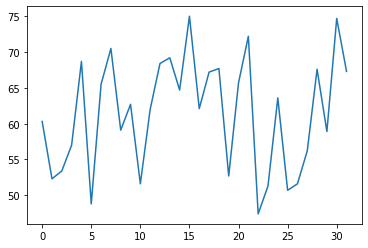

In [137]:
plt.plot(sdata.endog)

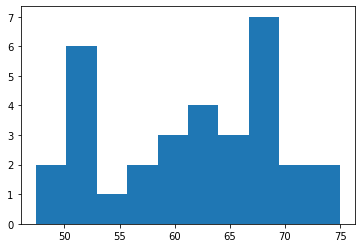

In [138]:
plt.hist(sdata.endog)
plt.show()

In [139]:
sglm_gamma = sm.GLM(sdata.endog, sdata.exog, family=sm.families.Gamma(sm.families.links.log()))
sglm_results = sglm_gamma.fit()
sglm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                       0.0035927
Method:                          IRLS   Log-Likelihood:                -83.110
Date:                Mon, 24 May 2021   Deviance:                     0.087988
Time:                        01:57:56   Pearson chi2:                   0.0862
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0024      0.001     -2.466      0.014      -0.004      -0.000
x2            -0.1005      0.031     -3.269      0.001      -0.161      -0.040
x3             0.0048      0.002      2.946      0.003       0.002       0.008
x4            -0.0067      0.003     -2.534      0.011      -0.012      -0.002
x5          8.173e-06   7.19e-06      1.136      0.256   -5.93e-06    2.23e-05
x6             0.0298      0.015      2.009      0.045       0.001       0.059
x7             0.0001   4.33e-05      2.724      0.006    3.31e-05       0.000
const          5.6581      0.680      8.318      0.000       4.325       6.991
==============================================================================
"""

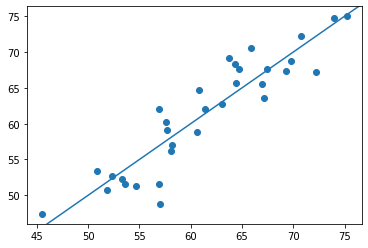

In [140]:
y_hat=sglm_results.predict()
fig, ax = plt.subplots()
ax.scatter(y_hat, sdata.endog)
line_fit = sm.OLS(sdata.endog, sm.add_constant(y_hat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

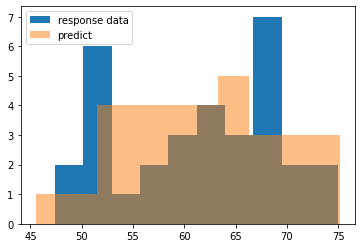

In [141]:
plt.hist(sdata.endog, label='response data')
plt.hist(y_hat,alpha=0.5,label='predict')
plt.legend()
plt.show()

# ワインデータの分析

ポルトガルのミーニョ地方（北西部）ヴィーニョ・ヴェルデのアルコール度数中程度の赤ワインの評価と物理化学的検査の結果です。データは2004年5月から2007年2月にかけて収集され公式認証機関（CVRVV）で検査されました。CVRVVは、ヴィーニョ・ヴェルデの品質とマーケティングを向上させることを目的とした専門組織です。ワインのサンプル検査はプロセスを自動的に管理するコンピュータシステムによって記録されました。また、評価については，各サンプルを最低3人の専門家が評価しています。評価は，0（非常に悪い）から10（素晴らしい）までのブラインドテイスティングの結果です。これからこのデータベースを活用して、データ分析の手法を学んでいきます。

データの読み込み

In [142]:
import pandas as pd
wb='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wdata=pd.read_csv(wb,sep=";",header=0)  
wdata_endog=wdata.quality
wdata_exog=wdata.iloc[:,:-1]
X = sm.add_constant(wdata_exog)

In [143]:
pglm = sm.GLM(wdata_endog, X, family=sm.families.Poisson())
wres_p=pglm.fit()
wres_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                            GLM   Df Residuals:                     1587
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.2
Date:                Mon, 24 May 2021   Deviance:                       119.10
Time:                        01:57:57   Pearson chi2:                     117.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6538     13.670      0.267      0.789     -23.140      30.447
fixed acidity            0.0037      0.017      0.220      0.826      -0.029       0.036
volatile acidity        -0.1977      0.080     -2.459      0.014      -0.355      -0.040
citric acid             -0.0359      0.096     -0.374      0.709      -0.224       0.153
residual sugar           0.0026      0.010      0.269      0.788      -0.016       0.022
chlorides               -0.3318      0.277     -1.198      0.231      -0.874       0.211
free sulfur dioxide      0.0008      0.001      0.584      0.559      -0.002       0.004
total sulfur dioxide    -0.0006      0.000     -1.273      0.203      -0.002       0.000
density                 -2.1729     13.953     -0.156      0.876     -29.519      25.174
pH                      -0.0748      0.124     -0.603      0.546      -0.318       0.168
sulphates                0.1591      0.073      2.191      0.028       0.017       0.301
alcohol                  0.0482      0.017      2.832      0.005       0.015       0.081
========================================================================================
"""

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(np.round(wres_p.predict()), wdata_endog, normalize=True)

0.5941213258286429

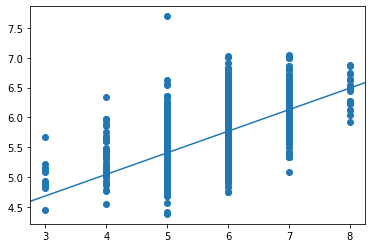

In [145]:
y_hat=wres_p.predict()
fig, ax = plt.subplots()
ax.scatter( wdata_endog,y_hat)
line_fit = sm.OLS(y_hat, sm.add_constant(wdata_endog, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

In [146]:
gglm = sm.GLM(wdata_endog, X, family=sm.families.Gamma(sm.families.links.log()))
wres_g=gglm.fit()
wres_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                            GLM   Df Residuals:                     1587
Model Family:                   Gamma   Df Model:                           11
Link Function:                    log   Scale:                        0.013125
Method:                          IRLS   Log-Likelihood:                -1581.9
Date:                Mon, 24 May 2021   Deviance:                       21.707
Time:                        01:57:58   Pearson chi2:                     20.8
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5579      3.747      0.950      0.342      -3.786      10.902
fixed acidity            0.0039      0.005      0.847      0.397      -0.005       0.013
volatile acidity        -0.2005      0.021     -9.365      0.000      -0.242      -0.159
citric acid             -0.0412      0.026     -1.582      0.114      -0.092       0.010
residual sugar           0.0027      0.003      1.028      0.304      -0.002       0.008
chlorides               -0.3265      0.074     -4.405      0.000      -0.472      -0.181
free sulfur dioxide      0.0008      0.000      1.965      0.049    1.99e-06       0.002
total sulfur dioxide    -0.0006      0.000     -4.350      0.000      -0.001      -0.000
density                 -2.0762      3.825     -0.543      0.587      -9.572       5.420
pH                      -0.0767      0.034     -2.264      0.024      -0.143      -0.010
sulphates                0.1613      0.020      7.981      0.000       0.122       0.201
alcohol                  0.0485      0.005     10.353      0.000       0.039       0.058
========================================================================================
"""

In [147]:
accuracy_score(np.round(wres_g.predict()), wdata_endog, normalize=True)

0.5953721075672295

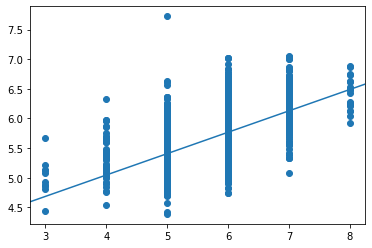

In [148]:
y_hat=wres_g.predict()
fig, ax = plt.subplots()
ax.scatter( wdata_endog,y_hat)
line_fit = sm.OLS(y_hat, sm.add_constant(wdata_endog, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

In [149]:
wdata_endog1=pd.concat([wdata_endog,10-wdata_endog],axis=1)
wmod_b = sm.GLM(wdata_endog1, X, family=sm.families.Binomial())
wres_b=wmod_b.fit()
wres_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     ['quality', 'quality']   No. Observations:                 1599
Model:                                GLM   Df Residuals:                     1587
Model Family:                    Binomial   Df Model:                           11
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2347.3
Date:                    Mon, 24 May 2021   Deviance:                       278.31
Time:                            01:57:58   Pearson chi2:                     275.
No. Iterations:                         4                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6031     21.017      0.362      0.718     -33.590      48.797
fixed acidity            0.0108      0.026      0.418      0.676      -0.040       0.061
volatile acidity        -0.4415      0.119     -3.698      0.000      -0.676      -0.208
citric acid             -0.0739      0.145     -0.508      0.611      -0.359       0.211
residual sugar           0.0069      0.015      0.467      0.641      -0.022       0.036
chlorides               -0.7680      0.413     -1.858      0.063      -1.578       0.042
free sulfur dioxide      0.0017      0.002      0.813      0.416      -0.002       0.006
total sulfur dioxide    -0.0013      0.001     -1.826      0.068      -0.003    9.61e-05
density                 -8.0015     21.453     -0.373      0.709     -50.049      34.046
pH                      -0.1690      0.190     -0.891      0.373      -0.541       0.203
sulphates                0.3781      0.114      3.313      0.001       0.154       0.602
alcohol                  0.1140      0.026      4.330      0.000       0.062       0.166
========================================================================================
"""

In [150]:
accuracy_score(np.round(wres_b.predict()*10),wdata_endog, normalize=True)

0.590368980612883

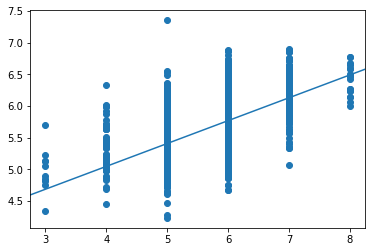

In [151]:
y_hat=(wres_b.predict()*10)
fig, ax = plt.subplots()
ax.scatter( wdata_endog,y_hat)
line_fit = sm.OLS(y_hat, sm.add_constant(wdata_endog, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.show()

In [152]:
wres_p.aic,wres_g.aic,wres_b.aic

(5878.404796111396, 3187.8852863921784, 4718.553322233771)